conda: pytorch_playground

In [1]:
import torch, torchvision
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

torch.set_printoptions(linewidth=120)

# Import model

In [2]:
import models
model = models.CNN()
model.load_state_dict(torch.load("model_folder/model_2_best_1.pt"))

<All keys matched successfully>

# Import data

In [3]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_data_train = torchvision.datasets.MNIST('mnist_data',
                                              transform=T,
                                              download=True, 
                                              train=True)
mnist_data_valid = torchvision.datasets.MNIST('mnist_data',
                                             transform=T,
                                             download=True, 
                                             train=False)
emnist_data_train = torchvision.datasets.EMNIST('emnist_data',
                                               split = "balanced",
                                               transform=T,
                                               download=True,
                                               train=True)
emnist_data_valid = torchvision.datasets.EMNIST('emnist_data',
                                               split = "balanced",
                                               transform=T,
                                               download=True,
                                               train=False)

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw




Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw
Processing...
Done!


KeyboardInterrupt: 

In [4]:
target = list(range(10))
target

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Batch

In [5]:
bs = 128
mnist_dataloader_train = torch.utils.data.DataLoader(mnist_data_train, batch_size=bs)
mnist_dataloader_valid = torch.utils.data.DataLoader(mnist_data_valid, batch_size=bs)
emnist_dataloader_train = torch.utils.data.DataLoader(emnist_data_train, batch_size=bs)
emnist_dataloader_valid = torch.utils.data.DataLoader(emnist_data_valid, batch_size=bs)

m_batch = next(iter(mnist_dataloader_train))
m_images, m_labels = m_batch

e_batch = next(iter(emnist_dataloader_train))
e_images, e_labels = e_batch

In [6]:
len(mnist_dataloader_train)

469

In [7]:
mnist_data_valid_1, mnist_data_valid_2 = torch.utils.data.random_split(mnist_data_valid, 
                                                                       [5000, 5000])
mnist_dataloader_valid_1 = torch.utils.data.DataLoader(mnist_data_valid_1, batch_size=bs)
mnist_dataloader_valid_2 = torch.utils.data.DataLoader(mnist_data_valid_2, batch_size=bs)

# MC_dropout

In [8]:
# batch = m_batch
# images, labels = batch

In [9]:
# images.shape

In [10]:
# model.eval()
# with torch.no_grad():
#     preds_eval = model(images)

# model.train()
# preds_eval_s = F.softmax(preds_eval, dim=1)

In [11]:
# n = 1000
# mc_list = []
# with torch.no_grad():
#     for i in range(n):
#         preds = model(images)
#         mc_list.append(preds.unsqueeze(dim=1))

In [12]:
# mc = torch.cat((mc_list), dim=1)
# mc_s = F.softmax(mc, dim=2)
# mc.shape

In [13]:
# img = 0
# mc_s[img].sum()

In [14]:
# mc.mean(dim=1).argmax(dim=1)

In [15]:
# plt.imshow(images[img].squeeze(), cmap = "gray")
# print("label:", labels[img])

In [16]:
# sns.stripplot(target, preds_eval[img], jitter=0)\
#     .set_title("Standard - Pre-softmax")

In [17]:
# sns.stripplot(target, preds_eval_s[img], jitter=0)\
#     .set_title("Standard - Pre-softmax")

In [18]:
# sns.stripplot(target*n, mc[img].reshape(mc[img].numel()), jitter=0.3)\
#     .set_title("MC_dropout - Pre-softmax")

In [19]:
# fig_mc_s = sns.stripplot(target*n, mc_s[img].reshape(mc_s[img].numel()), jitter=0.3)\
#     .set_title("MC_dropout - Softmax")

In [20]:
# fig_mc_b = sns.boxplot(target*n, mc_s[img].reshape(mc_s[img].numel()))
# fig_mc_b.set_title("MC_dropout - Softmax")

In [21]:
# fig_mc_b

# FINAL TRY?

## SET: n

In [22]:
# mnist_dataloader_valid_1

In [23]:
n = 100

In [24]:
# batch = m_batch
# images, labels = batch

### predictions & labels

In [25]:
prediction_list = []
label_list = []
model.eval()
with torch.no_grad():
    for images, labels in mnist_dataloader_valid_1:
        preds_eval = model(images)
        preds_eval_s = F.softmax(preds_eval, dim=1)
        prediction_list.append(preds_eval_s)
        label_list.append(labels)
model.train()

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (drop): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [26]:
preds_eval_s = torch.cat(prediction_list, dim=0)
labels = torch.cat(label_list, dim=0)

In [27]:
preds_eval_s.shape

torch.Size([5000, 10])

#### DEF

In [28]:
def Get_preds_and_labels(model, data_loader):
    prediction_list = []
    label_list = []
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            preds_eval = model(images)
            preds_eval_s = F.softmax(preds_eval, dim=1)
            prediction_list.append(preds_eval_s)
            label_list.append(labels)
    model.train()
    preds = torch.cat(prediction_list, dim=0)
    labels = torch.cat(label_list, dim=0)
    mc_labels = preds.argmax(dim=1).eq(labels).type_as(preds)
    mc_labels = 1 - mc_labels
    return preds, labels, mc_labels

## MC_dropout

In [29]:
mc_batch_list = []
with torch.no_grad():
    for images, _ in mnist_dataloader_valid_1: 
        mc_list = []
        for i in range(n):
            preds = model(images)
            mc_list.append(preds.unsqueeze(dim=2))
        mc = torch.cat((mc_list), dim=2)
        mc_s = F.softmax(mc, dim=1)
        mc_batch_list.append(mc_s)

In [30]:
mc_s = torch.cat(mc_batch_list, dim=0)
# mc_s[img].sum() # =n
mc_s.shape

torch.Size([5000, 10, 100])

### DEF

## GET MC VALUES

In [31]:
mc_s.shape

torch.Size([5000, 10, 100])

In [32]:
image_values = []
for _image in mc_s:
    target_values = []
    for _target in _image:
        target_values.append(_target.mean())
        target_values.append(_target.std())
    image_values.append(target_values)
mc_tensor = torch.tensor(image_values)
mc_tensor.shape

torch.Size([5000, 20])

In [33]:
# model.eval()
# with torch.no_grad():
#     preds_eval = model(images)

# model.train()
# preds_eval_s = F.softmax(preds_eval, dim=1)

In [34]:
mc_labels = preds_eval_s.argmax(dim=1).eq(labels).type_as(preds_eval_s)

In [35]:
print(mc_tensor.shape)
preds_eval_s.shape

torch.Size([5000, 20])


torch.Size([5000, 10])

In [36]:
# np.percentile(mc_s[0][4], [0, 25, 50, 75, 100])

In [37]:
mc_features = torch.cat((mc_tensor, preds_eval_s), dim=1)
mc_features.shape

torch.Size([5000, 30])

In [38]:
def Get_MC_dropout_features(model, data_loader, preds, n=100, top_n=5):
    # Get mc_drop predictions
    mc_batch_list = []
    with torch.no_grad():
        for images, _ in data_loader: 
            mc_list = []
            for i in range(n):
                mc_preds = model(images)
                mc_list.append(mc_preds.unsqueeze(dim=2))
            mc = torch.cat((mc_list), dim=2)
            mc_s = F.softmax(mc, dim=1)
            mc_batch_list.append(mc_s)
    mc_s = torch.cat(mc_batch_list, dim=0)
    
    # Get mean and stdev for each sample
    image_values = []
    for _image in mc_s:
        target_values = []
        for _target in _image:
            target_values.append(_target.mean())
            target_values.append(_target.std())
        image_values.append(target_values)
    mc_tensor = torch.tensor(image_values)
    X = torch.cat((mc_tensor, preds), dim=1)
    
    # Shape in format for new model (order on highest preds)
    X_list = []
    for i in range(len(X)):
        index = reversed(X[i][20:30].argsort())[:top_n]
        keep_values = torch.cat((X[i][20:30][index], X[i][index*2], X[i][index*2+1]))
        X_list.append(keep_values.unsqueeze(dim=0))
    X = torch.cat(X_list, dim=0)
    return X

### Now add letters to the training data

In [39]:
# batch_e = e_batch
# images_e, labels_e = batch_e

# model.eval()
# with torch.no_grad():
#     preds_eval_e = model(images_e)

# model.train()
# preds_eval_s_e = F.softmax(preds_eval_e, dim=1)

# mc_list_e = []
# with torch.no_grad():
#     for i in range(n):
#         preds_e = model(images_e)
#         mc_list_e.append(preds_e.unsqueeze(dim=2))
        
# mc_e = torch.cat((mc_list_e), dim=2)
# mc_s_e = F.softmax(mc_e, dim=1)
# # mc_s[img].sum() # =n
# mc_e.shape

In [40]:
# image_values_e = []
# for _image_e in mc_s_e:
#     target_values_e = []
#     for _target_e in _image_e:
#         target_values_e.append(_target_e.mean())
#         target_values_e.append(_target_e.std())
#     image_values_e.append(target_values_e)
# mc_tensor_e = torch.tensor(image_values_e)
# mc_tensor_e.shape

In [41]:
# mc_labels_e = preds_eval_s.argmax(dim=1).eq(labels).type_as(preds_eval_s)
# mc_labels_e.shape

In [42]:
# mc_labels_e = [0] * preds_eval_s.shape[0]
# mc_labels_e = torch.zeros(2000)

In [43]:
# mc_features_e = torch.cat((mc_tensor_e, preds_eval_s), dim=1)
# mc_features_e.shape

In [44]:
# mc_features_e.eq(mc_features)

In [45]:
# mc_features_e[0]

In [46]:
# mc_features

### PLOT

In [47]:
targets = []
for i in range(10):
    for _ in range(n):
        targets.append(i)

In [102]:
img = 1235#55#3 #7#55   #1235 #10
#7 mnist_data_valid_1 #55

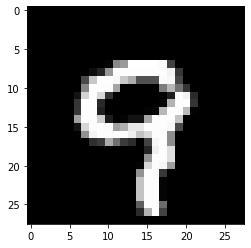

In [103]:
plt.imshow(mnist_data_valid_1[img][0].squeeze(), cmap = "gray")

In [50]:
with torch.no_grad():
    model.eval()
    example_pred = F.softmax(model(mnist_data_valid_1[img][0].unsqueeze(dim=0)).reshape(10), dim=0)
    model.train()

(0.0, 1.0)

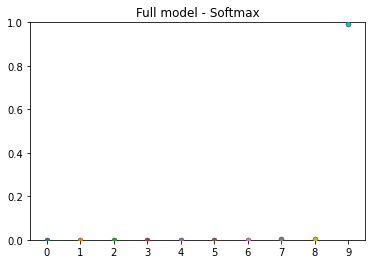

In [51]:
fig=sns.stripplot(target, example_pred, jitter=0.0, linewidth=0.5)
fig.set_title("Full model - Softmax")
plt.ylim(0, 1)

(0.0, 1.0)

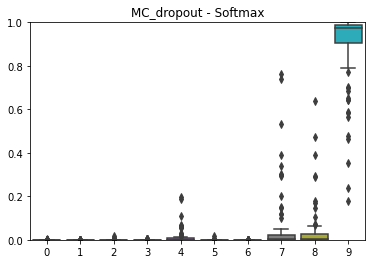

In [52]:
fig_mc_b = sns.boxplot(targets, mc_s[img].reshape(mc_s[img].numel()))
fig_mc_b.set_title("MC_dropout - Softmax")
plt.ylim(0, 1)

(0.0, 1.0)

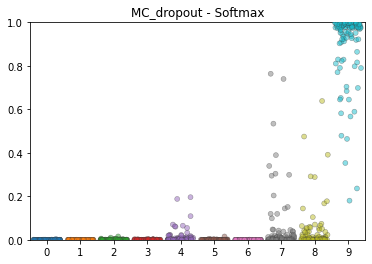

In [53]:
fig_mc_b = sns.stripplot(targets, mc_s[img].reshape(mc_s[img].numel()), 
                         jitter=0.4, linewidth=0.5, alpha=0.5)
fig_mc_b.set_title("MC_dropout - Softmax")
plt.ylim(0, 1)

In [54]:
# mc_s_e.shape

In [55]:
# fig_mc_b_e = sns.boxplot(targets, mc_s_e[img].reshape(mc_s_e[img].numel()))
# fig_mc_b_e.set_title("MC_dropout - Softmax - e")

## EMNIST

In [56]:
def Get_MC_drop_probs(model, images, img):
# Get mc_drop predictions
    mc_batch_list = []
    with torch.no_grad():
        mc_list = []
        for i in range(n):
            mc_preds = model(images.unsqueeze(dim=0))
            mc_list.append(mc_preds.unsqueeze(dim=2))
        mc = torch.cat((mc_list), dim=2)
        mc_s = F.softmax(mc, dim=1)
        mc_batch_list.append(mc_s)
    mc_s = torch.cat(mc_batch_list, dim=0)
    return mc_s

In [57]:
img = 5 #2

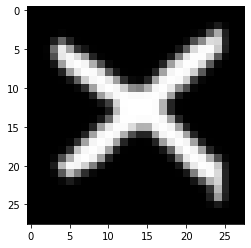

In [58]:
plt.imshow(emnist_data_valid[img][0].squeeze(), cmap = "gray")

In [59]:
with torch.no_grad():
    model.eval()
    example_pred = F.softmax(model(emnist_data_valid[img][0].unsqueeze(dim=0)).reshape(10), dim=0)
    model.train()

(0.0, 1.0)

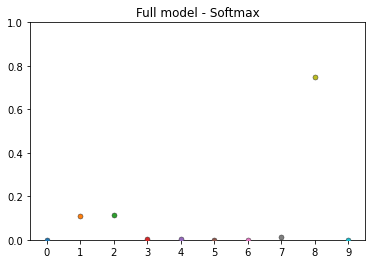

In [60]:
fig = sns.stripplot(target, example_pred, jitter=0, linewidth=0.5)
fig.set_title("Full model - Softmax")
plt.ylim(0, 1)

In [61]:
mc_s_e = Get_MC_drop_probs(model, emnist_data_valid[img][0], img)

(0.0, 1.0)

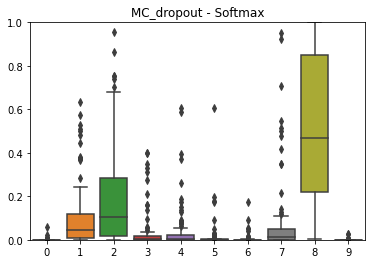

In [62]:
fig_mc_b = sns.boxplot(targets, mc_s_e.reshape(mc_s_e.numel()))
fig_mc_b.set_title("MC_dropout - Softmax")
plt.ylim(0, 1)

(0.0, 1.0)

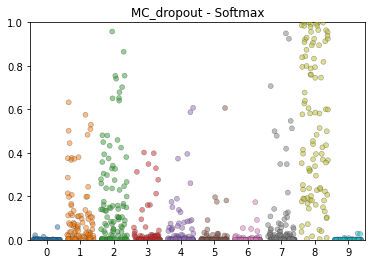

In [63]:
fig_mc_b = sns.stripplot(targets, mc_s_e.reshape(mc_s_e.numel()), 
                         jitter=0.4, linewidth=0.5, alpha=0.5)
fig_mc_b.set_title("MC_dropout - Softmax")
plt.ylim(0, 1)

# Just for figure

In [270]:
trgts = []
trgts.extend(["prediciton 1"]*100)
trgts.extend(["prediction 2"]*100)
len(trgts)

200

In [271]:
dst = np.random.beta(a=80, b=80, size = 100)

In [272]:
dst2 = np.random.uniform(size = 100)

In [273]:
dsts = []
dsts.extend(dst)
dsts.extend(dst2)
len(dsts)

200

(0.0, 1.0)

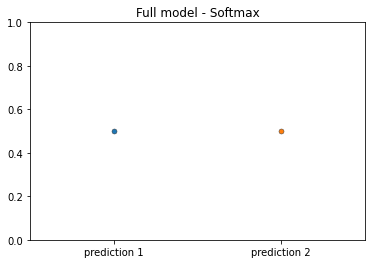

In [274]:
figga = sns.stripplot(["prediction 1", "prediction 2"], [0.5, 0.5], 
                         jitter=0.0, linewidth=0.5)
figga.set_title("Full model - Softmax")
plt.ylim(0, 1)

(0.0, 1.0)

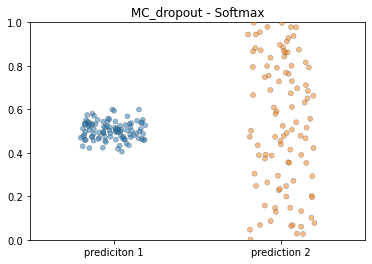

In [281]:
figga = sns.stripplot(trgts, dsts, 
                         jitter=0.2, linewidth=0.5, alpha=0.5)
figga.set_title("MC_dropout - Softmax")
plt.ylim(0, 1)

(0.0, 1.0)

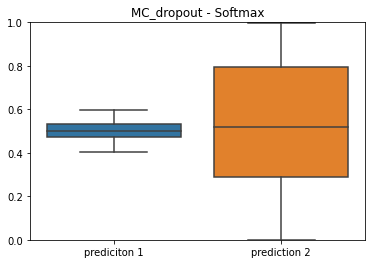

In [276]:
fig_mc_b = sns.boxplot(trgts, dsts)
fig_mc_b.set_title("MC_dropout - Softmax")
plt.ylim(0, 1)

In [277]:
len([0.5]+dst+dst2)

100

In [278]:
len(dst)

100

In [279]:
[2]+[3]

[2, 3]

In [280]:
a=80
b=20
c=a/(a+b)
c

0.8

In [206]:
a=100
b=200
c=a/(a+b)
c

0.009900990099009901

In [ ]:
c*(a+b)=a
a+b = a/c
b = a/c-a

In [197]:
a=40
c=0.8
b = a/c-a
b

10.0

In [ ]:
u_e_tar = 

In [ ]:
fig_mc_b = sns.stripplot(targets, mc_s_e.reshape(mc_s_e.numel()), 
                         jitter=0.4, linewidth=0.5, alpha=0.5)
fig_mc_b.set_title("MC_dropout - Softmax")
plt.ylim(0, 1)

# Combine MNIST and EMNIST data

In [64]:
# X = torch.cat((mc_features, mc_features_e))
# y = torch.cat((mc_labels, mc_labels_e))

In [65]:
# X.shape

In [66]:
# y.shape

In [67]:
# # y = np.array(y, dtype=int)
# one = 0
# zero = 0
# for i in y:
#     if i == 1:
#         one += 1
#     if i == 0:
#         zero += 1
# one, zero

# Data for new model

In [68]:
X = mc_features
y = mc_labels

In [69]:
y2 = 1-y
y2.nonzero().shape

torch.Size([135, 1])

In [70]:
# index = reversed(X[0][20:30].argsort())[:2]

eval probs  -  mc prob mean  -  mc prob std

In [71]:
# torch.cat((X[0][20:30][index], X[0][index*2], X[0][index*2+1]))

Loop top 2

In [72]:
# new_X_list = []
# for i in range(len(X)):
#     index = reversed(X[i][20:30].argsort())[:2]
#     keep_values = torch.cat((X[i][20:30][index], X[i][index*2], X[i][index*2+1]))
#     new_X_list.append(keep_values.unsqueeze(dim=0))
# new_X = torch.cat(new_X_list, dim=0)

In [73]:
# new_X.shape

SAME BUT NOW WITH 5 (best)

In [74]:
y2 = 1-y

In [75]:
X2_list = []
for i in range(len(X)):
    index_2 = reversed(X[i][20:30].argsort())[:5]
    keep_values_2 = torch.cat((X[i][20:30][index_2], X[i][index_2*2], X[i][index_2*2+1]))
    X2_list.append(keep_values_2.unsqueeze(dim=0))
X2 = torch.cat(X2_list, dim=0)

NOW ALL

In [76]:
# new_X_3_list = []
# for i in range(len(X)):
#     index_3 = reversed(X[i][20:30].argsort())
#     keep_values_3 = torch.cat((X[i][20:30][index_3], X[i][index_3*2], X[i][index_3*2+1]))
#     new_X_3_list.append(keep_values_3.unsqueeze(dim=0))
# new_X_3 = torch.cat(new_X_3_list, dim=0)

### Only stdev

In [77]:
# newer_X_list = []
# for i in range(len(X)):
#     stdevs = X[i][[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]]
#     newer_X_list.append(stdevs.unsqueeze(dim=0))
# newer_X = torch.cat(newer_X_list, dim=0)

In [78]:
# newer_X.shape

## Only stdev + odered

In [79]:
# newerer_X_list = []
# for i in range(len(X)):
#     stdevs = sorted(X[i][[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]])
#     newerer_X_list.append(torch.tensor(stdevs).unsqueeze(dim=0))
# newerer_X = torch.cat(newerer_X_list, dim=0)

In [80]:
# sorted(X[i][[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]])

In [81]:
# newerer_X.shape

# NEW MODEL

In [82]:
# !pip install sklearn

In [83]:
import sklearn as sk 
sk.__version__

'0.22.2.post1'

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score

from sklearn import metrics

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

# from datetime import datetime
import pickle

In [85]:
# train_X, test_X, train_y, test_y = train_test_split(X2, y, test_size = 0.2)

## Compare models

In [114]:
def compare_models(X, Y, scoring, kfold_cv=10, y_min=0.0): 
    '''
    Comparing 6 models: LR (linear regression), LDA (logistic discriminant 
    analysis), RF (random forest), DT (decision tree), KNN (k-nearest neighbours),
    NB (Naive Bayes classifier) using k-fold crossvalidation. 
    A plot will be shown to demonstrate the distribution of the accuracy values.
    
    Input: X_train and y_train dataframes, preset: 10 fold CV.
    
    Output: Dataframe with the 6 models and their properties.
    '''
    # prepare models and append the various models
    models = []
    models.append(('LR',  LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('RF',  RandomForestClassifier()))
    models.append(('DT',  DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('NB',  GaussianNB()))
    models.append(('SVM', SVC()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = scoring 
    # train the models using cross validation
    for name, model in models:
        # prepare the cross validation
        kfold = model_selection.KFold(n_splits=kfold_cv)
        # get the cross validation results (where the magic happens)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        # append these results to the results list
        results.append(cv_results)
        # append the name to the name list
        names.append(name)
        # put it in a nice format and extract the meand and std
        model_acc = "{}: \t{:.4f} ({:.4f})".format(name, cv_results.mean(), cv_results.std()) 
        # print the accuracy values of the models
        print(model_acc)
    # boxplot algorithm comparison, make a boxplot of the results
    fig = plt.figure()
    fig.suptitle(f'Algorithm Comparison ({scoring})')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.ylim(y_min, 1)
    plt.show()
    # make dataframe with the names of he model and the actual model (to be saved)
    models_df = pd.DataFrame(models, columns = ["model", "model_info"])
    return models_df

In [115]:
# compare_models(X, y)

In [116]:
# compare_models(new_X, y)

LR: 	0.2350 (0.0818)
LDA: 	0.6735 (0.0966)
RF: 	0.1902 (0.0946)
DT: 	0.4178 (0.1329)
KNN: 	0.2902 (0.0891)
NB: 	0.8609 (0.0710)
SVM: 	0.0000 (0.0000)


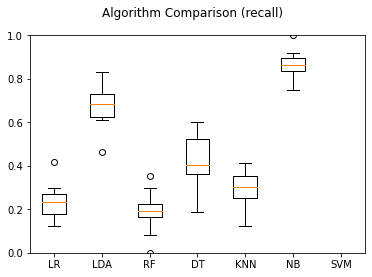

In [117]:
uncertainty_models = compare_models(X2, y2, "recall")

LR: 	0.6146 (0.0411)
LDA: 	0.8238 (0.0479)
RF: 	0.6110 (0.0539)
DT: 	0.6970 (0.0789)
KNN: 	0.6414 (0.0442)
NB: 	0.8964 (0.0346)
SVM: 	0.5000 (0.0000)


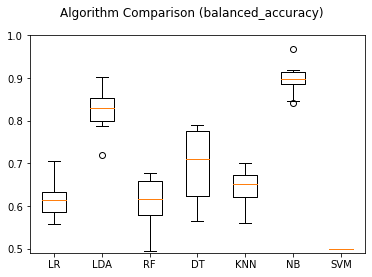

In [195]:
uncertainty_models = compare_models(X2, y2, "balanced_accuracy", y_min=0.49)

LR: 	0.9738 (0.0045)
LDA: 	0.9660 (0.0057)
RF: 	0.9726 (0.0053)
DT: 	0.9666 (0.0059)
KNN: 	0.9736 (0.0071)
NB: 	0.9302 (0.0060)
SVM: 	0.9730 (0.0059)


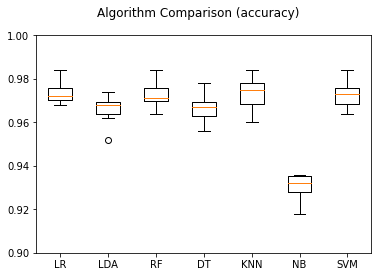

In [124]:
uncertainty_models = compare_models(X2, y2, "accuracy", y_min=0.9)

In [125]:
# compare_models(new_X_3, y)

In [126]:
# compare_models(newer_X, y)

In [127]:
# compare_models(newerer_X, y)

In [128]:
rf = RandomForestClassifier()

In [129]:
rf.fit(X2, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<BarContainer object of 15 artists>

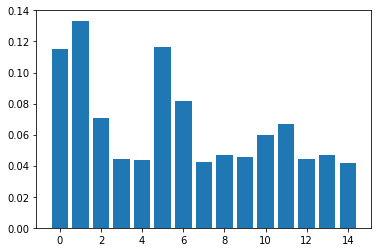

In [130]:
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

In [131]:
# pickle.dump(rf, open("model_folder/rf_uncertainty_model.sav", "wb"))

In [132]:
# loaded_model = pickle.load(open("model_folder/rf_uncertainty_model.sav", "rb"))

In [ ]:
# loaded_model.predict(new_X_2[2400].unsqueeze(dim=0))

In [138]:
# new_X_2[:1000]

In [139]:
nb = GaussianNB()

In [140]:
nb.fit(X2, y2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [141]:
nb.predict(X2)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [142]:
confusion_matrix(y_true= y2, y_pred=nb.predict(X2))

array([[4536,  329],
       [  18,  117]])

# Final test

In [169]:
f_preds, f_labels, f_y = Get_preds_and_labels(model, mnist_dataloader_valid_2)

In [170]:
f_X = Get_MC_dropout_features(model, mnist_dataloader_valid_2, f_preds, n=100, top_n=5)

In [171]:
f_y_pred = nb.predict(f_X)

In [172]:
confusion_matrix(y_true = f_y, y_pred = f_y_pred)

array([[4573,  310],
       [  22,   95]])

In [173]:
balanced_accuracy_score(f_y, f_y_pred)

0.8742401249056994

In [174]:
recall_score(f_y, f_y_pred)

0.811965811965812

In [175]:
f_preds.shape

torch.Size([5000, 10])

In [176]:
b_acc_list = []
recall_list = []

for i in range(10):
    f_X = Get_MC_dropout_features(model, mnist_dataloader_valid_2, f_preds, n=100, top_n=5)
    f_y_pred = nb.predict(f_X)
    b_acc_list.append(balanced_accuracy_score(f_y, f_y_pred))
    recall_list.append(recall_score(f_y, f_y_pred))

In [185]:
sorted(b_acc_list)

[0.8747521052456543,
 0.8774896684992937,
 0.8786160252471946,
 0.8786160252471946,
 0.8787184213151855,
 0.8791280055871495,
 0.882070360976771,
 0.882377549180744,
 0.8866510534542482,
 0.8871630337942031]

In [181]:
np.mean(b_acc_list)

0.8805582248547639

In [184]:
sorted(recall_list)

[0.811965811965812,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8290598290598291,
 0.8290598290598291,
 0.8376068376068376,
 0.8376068376068376]

In [183]:
np.mean(recall_list)

0.8247863247863247

# Final test on EMNIST

In [186]:
ef_preds, ef_labels, ef_y = Get_preds_and_labels(model, emnist_dataloader_valid)

In [187]:
ef_y = torch.ones(ef_y.shape[0])

In [188]:
ef_X = Get_MC_dropout_features(model, emnist_dataloader_valid, ef_preds, n=50, top_n=5)

In [189]:
ef_y_pred = nb.predict(ef_X)

In [190]:
confusion_matrix(y_true = ef_y, y_pred = ef_y_pred)

array([[    0,     0],
       [ 4737, 14063]])

In [191]:
recall_score(ef_y, ef_y_pred)

0.748031914893617

In [192]:
accuracy_score(ef_y, ef_y_pred)

NameError: name 'accuracy_score' is not defined

In [193]:
balanced_accuracy_score(ef_y, ef_y_pred)

/Users/joey/.conda/envs/rabbitmq_pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.748031914893617